# FML Homework Assignment 2
## Hands on SVM

### 1. Library Imports

In [20]:
%load_ext autoreload
%autoreload 2

from libsvm.svmutil import *
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Data Preparation

In [ ]:
# read the data file
with open('./abalone.data', 'r') as file:
    input_data_str = file.read()
    file.close()

# convert data to string
input_data_list = input_data_str.split('\n')[:-1]

# Replace Male, Female and Infant with 1, -1 and 0 for embedding.
for i, point in enumerate(input_data_list):
    new_point = point.replace('M', '1')
    new_point = new_point.replace('F', '-1')
    new_point = new_point.replace('I', '0')
    input_data_list[i] = new_point

# Convert into list of list
for i, point in enumerate(input_data_list):
    point_list = point.split(',')
    point_list = [float(j) for j in point_list]
    input_data_list[i] = point_list

# Convert data into the correct format according to Libsvm documentation
for i, input_line in enumerate(input_data_list):
    age = input_line[-1]
    input_line = input_line[:-1]
    for j in range(len(input_line)):
        input_line[j] = str(j+1)+':'+str(input_line[j])
    if(age<10):
        label = '-1'
    else:
        label = '+1'
    input_line.insert(0,label)
    input_data_list[i] = input_line

for i, input_line in enumerate(input_data_list):
    input_line = ' '.join(input_line)
    input_data_list[i] = input_line

format_data_str = '\n'.join(input_data_list)

# Save data
with open('./abalone','w+') as file:
    file.write(format_data_str)
    file.close()

Beyond this step the data is split into train and test as asked in the question manually (since the dataset is small and the split is not random, simple copy and paste can accomplish this).

### 3. Read and Scale Data

In [2]:
ytr, xtr = svm_read_problem('abalone.train', return_scipy=True)

scale_param = csr_find_scale_param(xtr, lower=0)

scaled_xtr = csr_scale(xtr, scale_param)

yts, xts = svm_read_problem('abalone.test', return_scipy=True)

scaled_xts = csr_scale(xts, scale_param)

### 4. Define model parameters and data folds

In [15]:
k_list = [0, 1, 2, 3]
C_list = [pow(3,-3), pow(3,-2), pow(3,-1), pow(3,0), pow(3,1), pow(3,2), pow(3,3)]
d_list = [1, 2, 3, 4, 5]

kf = KFold(n_splits=5, random_state=0, shuffle=True)

### 5. Model Training

In [16]:
model_dict = {}
for d in d_list:
    model_dict[d] = {}
    for C in C_list:
        model_dict[d][C] = {}
        fold = 0
        for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
            fold += 1
            prob  = svm_problem(ytr[train_idx], scaled_xtr[train_idx])
            param = svm_parameter('-t 1 -d ' + str(d) + ' -c ' + str(C))
            model = svm_train(prob, param)
            model_dict[d][C][fold] = model

.
*
optimization finished, #iter = 1164
nu = 0.916821
obj = -74.936915, rho = 1.447683
nSV = 2298, nBSV = 2296
Total nSV = 2298
.
*
optimization finished, #iter = 1163
nu = 0.912513
obj = -74.979308, rho = 1.462816
nSV = 2288, nBSV = 2286
Total nSV = 2288
.
*
optimization finished, #iter = 1156
nu = 0.909466
obj = -74.598996, rho = 1.480615
nSV = 2280, nBSV = 2277
Total nSV = 2280
.
*
optimization finished, #iter = 1155
nu = 0.907858
obj = -74.550832, rho = 1.463130
nSV = 2276, nBSV = 2276
Total nSV = 2276
.
*
optimization finished, #iter = 1161
nu = 0.911832
obj = -74.676988, rho = 1.455023
nSV = 2286, nBSV = 2284
Total nSV = 2286
.
*
optimization finished, #iter = 1035
nu = 0.777828
obj = -196.542141, rho = 1.972728
nSV = 1950, nBSV = 1948
Total nSV = 1950
.
*
optimization finished, #iter = 1045
nu = 0.780164
obj = -197.511948, rho = 1.937277
nSV = 1956, nBSV = 1954
Total nSV = 1956
.
*
optimization finished, #iter = 1026
nu = 0.775849
obj = -196.430507, rho = 1.996423
nSV = 1946, nB

*
optimization finished, #iter = 925
nu = 0.627367
obj = -4503.214393, rho = 1.695300
nSV = 1575, nBSV = 1572
Total nSV = 1575
*
optimization finished, #iter = 925
nu = 0.628349
obj = -4517.626921, rho = 1.688138
nSV = 1577, nBSV = 1574
Total nSV = 1577
*
optimization finished, #iter = 943
nu = 0.600214
obj = -12859.548973, rho = 1.651135
nSV = 1508, nBSV = 1501
Total nSV = 1508
*
optimization finished, #iter = 942
nu = 0.602208
obj = -12869.680511, rho = 1.546727
nSV = 1512, nBSV = 1507
Total nSV = 1512
*
optimization finished, #iter = 922
nu = 0.599040
obj = -12865.806590, rho = 1.668974
nSV = 1504, nBSV = 1496
Total nSV = 1504
*
optimization finished, #iter = 993
nu = 0.596616
obj = -12788.093922, rho = 1.675859
nSV = 1499, nBSV = 1493
Total nSV = 1499
*
optimization finished, #iter = 948
nu = 0.599479
obj = -12855.108951, rho = 1.676276
nSV = 1508, nBSV = 1500
Total nSV = 1508
.
*
optimization finished, #iter = 1189
nu = 0.563283
obj = -36444.094509, rho = 1.522699
nSV = 1416, nBSV

.
*
optimization finished, #iter = 1201
nu = 0.948125
obj = -723.979420, rho = 1.009699
nSV = 2376, nBSV = 2376
Total nSV = 2376
.
*
optimization finished, #iter = 1176
nu = 0.925868
obj = -712.968996, rho = 1.016403
nSV = 2322, nBSV = 2320
Total nSV = 2322
.
*
optimization finished, #iter = 1184
nu = 0.929705
obj = -711.068193, rho = 1.015747
nSV = 2330, nBSV = 2328
Total nSV = 2330
.
*
optimization finished, #iter = 1182
nu = 0.930358
obj = -714.121418, rho = 1.013550
nSV = 2334, nBSV = 2332
Total nSV = 2334
.
*
optimization finished, #iter = 1188
nu = 0.934421
obj = -718.370623, rho = 1.013519
nSV = 2344, nBSV = 2342
Total nSV = 2344
.
*
optimization finished, #iter = 1100
nu = 0.853152
obj = -1950.526322, rho = 1.038749
nSV = 2138, nBSV = 2138
Total nSV = 2138
.
*
optimization finished, #iter = 1092
nu = 0.842450
obj = -1937.649979, rho = 1.045474
nSV = 2114, nBSV = 2110
Total nSV = 2114
.
*
optimization finished, #iter = 1094
nu = 0.839471
obj = -1919.677467, rho = 1.047654
nSV = 

.
*
optimization finished, #iter = 1025
nu = 0.770029
obj = -16283.489942, rho = 1.035501
nSV = 1932, nBSV = 1930
Total nSV = 1932
*
optimization finished, #iter = 989
nu = 0.712152
obj = -45692.054496, rho = 1.063533
nSV = 1787, nBSV = 1783
Total nSV = 1787
*
optimization finished, #iter = 982
nu = 0.711768
obj = -45683.695401, rho = 1.064474
nSV = 1784, nBSV = 1781
Total nSV = 1784
*
optimization finished, #iter = 984
nu = 0.701788
obj = -45085.425543, rho = 1.070590
nSV = 1760, nBSV = 1757
Total nSV = 1760
*
optimization finished, #iter = 984
nu = 0.709115
obj = -45574.596009, rho = 1.068180
nSV = 1779, nBSV = 1776
Total nSV = 1779
*
optimization finished, #iter = 985
nu = 0.711861
obj = -45743.578186, rho = 1.067008
nSV = 1786, nBSV = 1782
Total nSV = 1786


### 6. Define Utility Functions

In [40]:
def test_errors(d, C, model_dict, yts, scaled_xts):
    err = []
    for fold in range(1,6):
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(yts, scaled_xts, m)
        err.append(1-(p_acc[0]/100))
    return err

def train_errors(d, C, model_dict, ytr, scaled_xtr):
    err = []
    fold = 0
    for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
        fold+=1
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(ytr[train_idx], scaled_xtr[train_idx], m)
        err.append(1-(p_acc[0]/100))
    return err

def cross_val_error(d, C, model_dict, ytr, scaled_xtr):
    err = []
    fold = 0
    for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
        fold+=1
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(ytr[val_idx], scaled_xtr[val_idx], m)
        err.append(1-(p_acc[0]/100))
    mean = sum(err) / len(err)
    variance = sum([((x - mean) ** 2) for x in err]) / len(err)
    std = variance ** 0.5
    return mean, std

def num_support_vectors(d, C, model_dict):
    sv = []
    for fold in range(1,6):
        m = model_dict[d][C][fold]
        sv.append(m.get_nr_sv())
    mean = sum(sv)*1.0/len(sv)
    return mean

### 7. Plot cross validation error as function of C for different d

Accuracy = 73.5247% (461/627) (classification)
Accuracy = 72.0893% (452/627) (classification)
Accuracy = 72.8868% (457/627) (classification)
Accuracy = 71.4058% (447/626) (classification)
Accuracy = 71.7252% (449/626) (classification)
Accuracy = 73.0463% (458/627) (classification)
Accuracy = 73.8437% (463/627) (classification)
Accuracy = 74.4817% (467/627) (classification)
Accuracy = 70.9265% (444/626) (classification)
Accuracy = 72.6837% (455/626) (classification)
Accuracy = 73.3652% (460/627) (classification)
Accuracy = 74.6411% (468/627) (classification)
Accuracy = 75.4386% (473/627) (classification)
Accuracy = 71.5655% (448/626) (classification)
Accuracy = 73.1629% (458/626) (classification)
Accuracy = 74.8006% (469/627) (classification)
Accuracy = 74.9601% (470/627) (classification)
Accuracy = 76.0766% (477/627) (classification)
Accuracy = 72.0447% (451/626) (classification)
Accuracy = 74.2812% (465/626) (classification)
Accuracy = 77.0335% (483/627) (classification)
Accuracy = 76

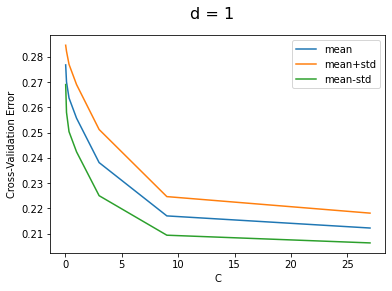

Accuracy = 65.0718% (408/627) (classification)
Accuracy = 59.9681% (376/627) (classification)
Accuracy = 59.9681% (376/627) (classification)
Accuracy = 62.1406% (389/626) (classification)
Accuracy = 63.4185% (397/626) (classification)
Accuracy = 72.2488% (453/627) (classification)
Accuracy = 71.2919% (447/627) (classification)
Accuracy = 70.1754% (440/627) (classification)
Accuracy = 70.9265% (444/626) (classification)
Accuracy = 70.2875% (440/626) (classification)
Accuracy = 73.6842% (462/627) (classification)
Accuracy = 71.4514% (448/627) (classification)
Accuracy = 73.0463% (458/627) (classification)
Accuracy = 73.1629% (458/626) (classification)
Accuracy = 71.5655% (448/626) (classification)
Accuracy = 74.6411% (468/627) (classification)
Accuracy = 71.9298% (451/627) (classification)
Accuracy = 74.9601% (470/627) (classification)
Accuracy = 73.8019% (462/626) (classification)
Accuracy = 72.6837% (455/626) (classification)
Accuracy = 75.1196% (471/627) (classification)
Accuracy = 74

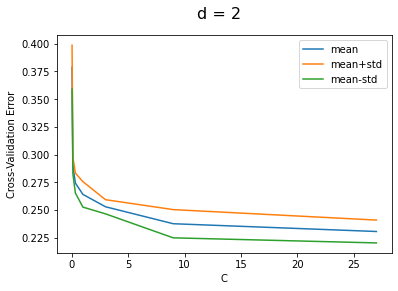

Accuracy = 69.2185% (434/627) (classification)
Accuracy = 48.9633% (307/627) (classification)
Accuracy = 51.1962% (321/627) (classification)
Accuracy = 50.9585% (319/626) (classification)
Accuracy = 52.0767% (326/626) (classification)
Accuracy = 63.9553% (401/627) (classification)
Accuracy = 58.3732% (366/627) (classification)
Accuracy = 59.3301% (372/627) (classification)
Accuracy = 60.0639% (376/626) (classification)
Accuracy = 61.9808% (388/626) (classification)
Accuracy = 70.4944% (442/627) (classification)
Accuracy = 67.7831% (425/627) (classification)
Accuracy = 66.0287% (414/627) (classification)
Accuracy = 68.6901% (430/626) (classification)
Accuracy = 69.8083% (437/626) (classification)
Accuracy = 72.2488% (453/627) (classification)
Accuracy = 71.4514% (448/627) (classification)
Accuracy = 71.1324% (446/627) (classification)
Accuracy = 71.7252% (449/626) (classification)
Accuracy = 70.2875% (440/626) (classification)
Accuracy = 74.0032% (464/627) (classification)
Accuracy = 71

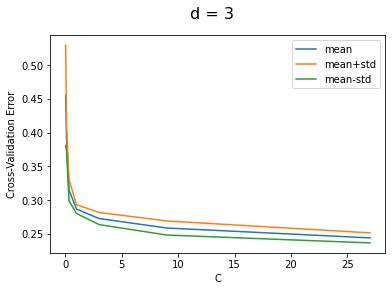

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 58.5327% (367/627) (classification)
Accuracy = 50.3987% (316/627) (classification)
Accuracy = 52.1531% (327/627) (classification)
Accuracy = 51.7572% (324/626) (classification)
Accuracy = 52.7157% (330/626) (classification)
Accuracy = 61.882% (388/627) (classification)
Accuracy = 57.7352% (362/627) (classification)
Accuracy = 58.8517% (369/627) (classification)
Accuracy = 59.7444% (374/626) (classification)
Accuracy = 60.5431% (379/626) (classification)
Accuracy = 66.8262% (419/627) (classification)
Accuracy = 65.0718% (408/627) (classification)
Accuracy = 63.4769% (398/627) (classification)
Accuracy = 66.2939% (415/626) (classification)
Accuracy = 67.2524% (421/626) (classification)
Accuracy = 70.8134% (444/627) (classification)
Accuracy = 69.2

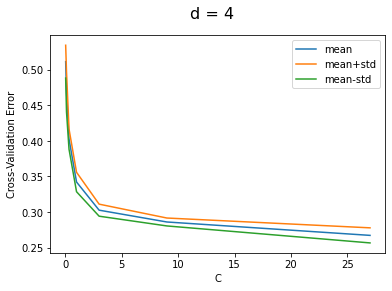

Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 44.6571% (280/627) (classification)
Accuracy = 48.3254% (303/627) (classification)
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 50.1597% (314/626) (classification)
Accuracy = 51.278% (321/626) (classification)
Accuracy = 57.8947% (363/627) (classification)
Accuracy = 51.1962% (321/627) (classification)
Accuracy = 52.4721% (329/627) (classification)
Accuracy = 52.5559% (329/626) (classification)
Accuracy = 53.9936% (338/626) (classification)
Accuracy = 61.4035% (385/627) (classification)
Accuracy = 56.7783% (356/627) (classification)
Accuracy = 58.2137% (365/627) (classification)
Accuracy = 58.9457% (369/626) (classification)
Accuracy = 59.9042% (375/626) (classification)
Accuracy = 65.7097% (412/627) (classification)
Accuracy = 63.4

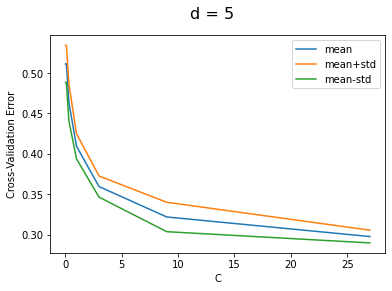

In [51]:
fig_dict = {}
min_mean = 1
for d in d_list:
    fig = plt.figure()
    fig.suptitle('d = '+str(d), fontsize=16)
    fig_x = C_list
    fig_y, fig_yu, fig_yl = [], [], []
    for C in C_list:
        mean, std = cross_val_error(d, C, model_dict, ytr, scaled_xtr)
        if(mean<min_mean):
            min_mean = mean
            C_star, d_star = C, d
        fig_y.append(mean)
        fig_yu.append(mean+std)
        fig_yl.append(mean-std)
    plt.plot(fig_x, fig_y, label='mean')
    plt.plot(fig_x, fig_yu, label='mean+std')
    plt.plot(fig_x, fig_yl, label='mean-std')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Error')
    plt.legend()
    plt.show()

Optimal C and d

In [47]:
C_star, d_star

(27, 1)

### 8. Plot error and support vectors as function of d

Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 78.7879% (494/627) (classification)
Accuracy = 77.9904% (489/627) (classification)
Accuracy = 79.5853% (499/627) (classification)
Accuracy = 79.2332% (496/626) (classification)
Accuracy = 78.2748% (490/626) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.1494% (795/1044) (classification)
Accuracy = 75.8621% (792/1044) (classification)
Accuracy = 76.6284% (800/1044) (classification)
Accuracy = 76.7241% (801/1044) (classification)
Accuracy = 78.1499% (490/627) (classification)
Accuracy = 76.555% (480/627) (classification)
Accuracy = 78.1499% (490/627) (classification)
Accuracy = 76.3578% (478/626) (classification)
Accuracy = 75.5591% (473/626) (classification)
Accuracy = 74.1379% (774/1044) (classification)
Acc

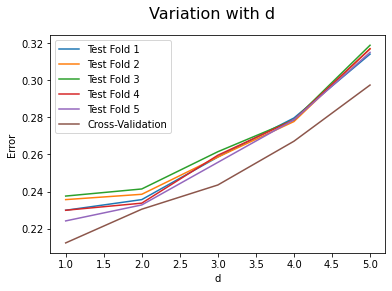

In [48]:
fig = plt.figure()
fig.suptitle('Error variation with d', fontsize=16)
fig_x = d_list
fig_yt1, fig_yt2, fig_yt3, fig_yt4, fig_yt5, fig_ycv = [], [], [], [], [], []
for d in d_list:
    err = test_errors(d, C_star, model_dict, yts, scaled_xts)
    fig_yt1.append(err[0])
    fig_yt2.append(err[1])
    fig_yt3.append(err[2])
    fig_yt4.append(err[3])
    fig_yt5.append(err[4])
    mean, _ = cross_val_error(d, C_star, model_dict, ytr, scaled_xtr)
    fig_ycv.append(mean)
plt.plot(fig_x, fig_yt1, label='Test Fold 1')
plt.plot(fig_x, fig_yt2, label='Test Fold 2')
plt.plot(fig_x, fig_yt3, label='Test Fold 3')
plt.plot(fig_x, fig_yt4, label='Test Fold 4')
plt.plot(fig_x, fig_yt5, label='Test Fold 5')
plt.plot(fig_x, fig_ycv, label='Cross-Validation')
plt.xlabel('d')
plt.ylabel('Error')
plt.legend()
plt.show()

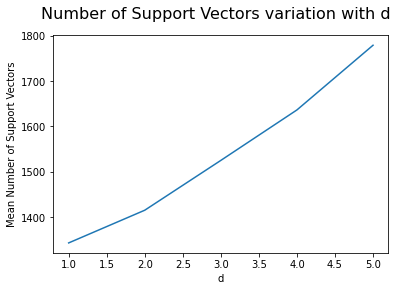

In [54]:
fig = plt.figure()
fig.suptitle('Number of Support Vectors variation with d', fontsize=16)
fig_x = d_list
fig_ysv = []
for d in d_list:
    fig_ysv.append(num_support_vectors(d, C_star, model_dict))
plt.plot(fig_x, fig_ysv)
plt.xlabel('d')
plt.ylabel('Mean Number of Support Vectors')
plt.show()

### 9. Plot train and test errors as function of data folds

Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 76.4368% (798/1044) (classification)
Accuracy = 76.2452% (796/1044) (classification)
Accuracy = 77.0115% (804/1044) (classification)
Accuracy = 77.5862% (810/1044) (classification)
Accuracy = 77.0115% (804/1044) (classifi

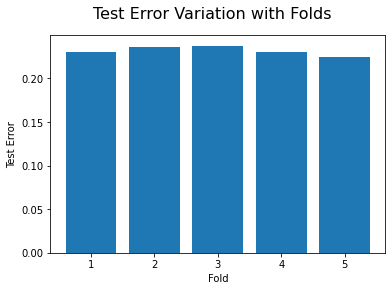

In [57]:
for fold in range(1,6):
    test_err = test_errors(d_star, C_star, model_dict, yts, scaled_xts)
fig = plt.figure()
fig.suptitle('Test Error Variation with Folds', fontsize=16)
fig_x = range(1,6)
plt.bar(fig_x, test_err)
plt.xlabel('Fold')
plt.ylabel('Test Error')
plt.show()

Accuracy = 78.5714% (1969/2506) (classification)
Accuracy = 78.6512% (1971/2506) (classification)
Accuracy = 78.3719% (1964/2506) (classification)
Accuracy = 78.58% (1970/2507) (classification)
Accuracy = 79.0187% (1981/2507) (classification)
Accuracy = 78.5714% (1969/2506) (classification)
Accuracy = 78.6512% (1971/2506) (classification)
Accuracy = 78.3719% (1964/2506) (classification)
Accuracy = 78.58% (1970/2507) (classification)
Accuracy = 79.0187% (1981/2507) (classification)
Accuracy = 78.5714% (1969/2506) (classification)
Accuracy = 78.6512% (1971/2506) (classification)
Accuracy = 78.3719% (1964/2506) (classification)
Accuracy = 78.58% (1970/2507) (classification)
Accuracy = 79.0187% (1981/2507) (classification)
Accuracy = 78.5714% (1969/2506) (classification)
Accuracy = 78.6512% (1971/2506) (classification)
Accuracy = 78.3719% (1964/2506) (classification)
Accuracy = 78.58% (1970/2507) (classification)
Accuracy = 79.0187% (1981/2507) (classification)
Accuracy = 78.5714% (1969/25

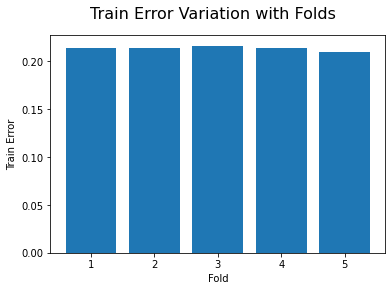

In [58]:
for fold in range(1,6):
    train_err = train_errors(d_star, C_star, model_dict, ytr, scaled_xtr)
fig = plt.figure()
fig.suptitle('Train Error Variation with Folds', fontsize=16)
fig_x = range(1,6)
plt.bar(fig_x, train_err)
plt.xlabel('Fold')
plt.ylabel('Train Error')
plt.show()